In [36]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 
import requests
from prophet import Prophet

In [63]:
eu_storage = pd.read_excel (r"C:\Users\39392\Desktop\Data Analytics\git\Prediction Model\data\EU-data-storage.xlsx")


In [64]:
eu_storage.head()

Gas Day Start  Gas in storage (TWh)  Full (%)  Trend (%)  Injection (GWh/d)  \
0    2022-09-05              914.9142      0.90       0.00            3791.52   
1    2022-09-04              911.4735     81.92       0.41            4740.01   
2    2022-09-03              906.8938     81.51       0.40            4614.09   
3    2022-09-02              902.4630     81.11       0.31            3799.10   
4    2022-09-01              898.9731     80.80       0.34            4381.57   

   Withdrawal (GWh/d)  Working gas volume (TWh)  Injection capacity (GWh/d)  \
0               380.3               101112.0090                    11699.42   
1               189.5                 1112.5986                    11678.27   
2               201.4                 1112.5986                    11678.49   
3               314.7                 1112.5986                    11678.69   
4               584.4                 1112.5986                    11678.64   

   Withdrawal capacity (GWh/d)  
0                     19886.49  
1                     19890.61  
2                     19890.04  
3                     19889.50  
4                     19889.66

In [65]:
eu_storage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gas Day Start                3962 non-null   object 
 1   Gas in storage (TWh)         3962 non-null   float64
 2   Full (%)                     3962 non-null   float64
 3   Trend (%)                    3962 non-null   float64
 4   Injection (GWh/d)            3962 non-null   float64
 5   Withdrawal (GWh/d)           3962 non-null   float64
 6   Working gas volume (TWh)     3962 non-null   float64
 7   Injection capacity (GWh/d)   3962 non-null   float64
 8   Withdrawal capacity (GWh/d)  3962 non-null   float64
dtypes: float64(8), object(1)
memory usage: 278.7+ KB


In [88]:
#let's transform in datetime extracting months, years, day of the week
eu_storage['Gas Day Start'] = pd.to_datetime(eu_storage['Gas Day Start'])
eu_storage['year'] = eu_storage['Gas Day Start'].dt.year
eu_storage['month'] = eu_storage['Gas Day Start'].dt.month
eu_storage['day'] = eu_storage['Gas Day Start'].dt.dayofweek
eu_storage.head()

Gas Day Start  Gas in storage (TWh)  Full (%)  Trend (%)  Injection (GWh/d)  \
0    2022-09-05              914.9142      0.90       0.00            3791.52   
1    2022-09-04              911.4735     81.92       0.41            4740.01   
2    2022-09-03              906.8938     81.51       0.40            4614.09   
3    2022-09-02              902.4630     81.11       0.31            3799.10   
4    2022-09-01              898.9731     80.80       0.34            4381.57   

   Withdrawal (GWh/d)  Working gas volume (TWh)  Injection capacity (GWh/d)  \
0               380.3               101112.0090                    11699.42   
1               189.5                 1112.5986                    11678.27   
2               201.4                 1112.5986                    11678.49   
3               314.7                 1112.5986                    11678.69   
4               584.4                 1112.5986                    11678.64   

   Withdrawal capacity (GWh/d)  year  month  Storage in Bcf  Injection in Bcf  \
0                     19886.49  2022      9     3121.816833         12.937203   
1                     19890.61  2022      9     3110.076677         16.173585   
2                     19890.04  2022      9     3094.450092         15.743929   
3                     19889.50  2022      9     3079.331575         12.963067   
4                     19889.66  2022      9     3067.423542         14.950537   

   Withdrawal in Bcf  day  
0           1.297637    0  
1           0.646601    6  
2           0.687205    5  
3           1.073801    4  
4           1.994056    3

In [79]:
#convert from TWH to Bcf and GWH to Bcf

eu_storage['Storage in Bcf'] = eu_storage['Gas in storage (TWh)']*3.4121416331279
eu_storage['Injection in Bcf'] = eu_storage['Injection (GWh/d)']*0.0034121416331279
eu_storage['Withdrawal in Bcf'] = eu_storage['Withdrawal (GWh/d)']*0.0034121416331279
eu_storage.head()

Gas Day Start  Gas in storage (TWh)  Full (%)  Trend (%)  Injection (GWh/d)  \
0    2022-09-05              914.9142      0.90       0.00            3791.52   
1    2022-09-04              911.4735     81.92       0.41            4740.01   
2    2022-09-03              906.8938     81.51       0.40            4614.09   
3    2022-09-02              902.4630     81.11       0.31            3799.10   
4    2022-09-01              898.9731     80.80       0.34            4381.57   

   Withdrawal (GWh/d)  Working gas volume (TWh)  Injection capacity (GWh/d)  \
0               380.3               101112.0090                    11699.42   
1               189.5                 1112.5986                    11678.27   
2               201.4                 1112.5986                    11678.49   
3               314.7                 1112.5986                    11678.69   
4               584.4                 1112.5986                    11678.64   

   Withdrawal capacity (GWh/d)  year  month  Storage in Bcf  Injection in Bcf  \
0                     19886.49  2022      9     3121.816833         12.937203   
1                     19890.61  2022      9     3110.076677         16.173585   
2                     19890.04  2022      9     3094.450092         15.743929   
3                     19889.50  2022      9     3079.331575         12.963067   
4                     19889.66  2022      9     3067.423542         14.950537   

   Withdrawal in Bcf  
0           1.297637  
1           0.646601  
2           0.687205  
3           1.073801  
4           1.994056

In [92]:
sns.lineplot(x='month', y='Injection in Bcf', hue='year', data=eu_storage).set_title('Eu Gas Bcf Injection per Year')
plt.show()

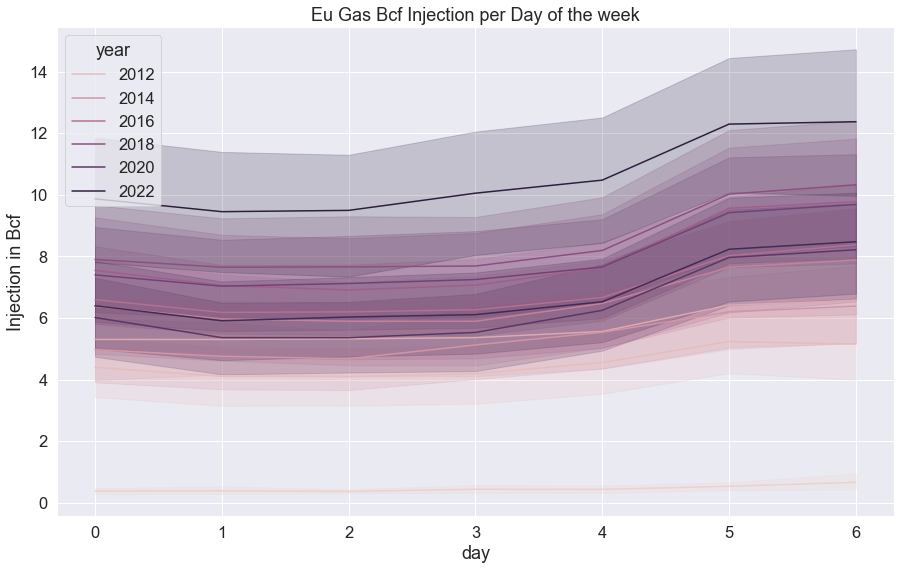

In [93]:
sns.lineplot(x='day', y='Injection in Bcf', hue='year', data=eu_storage).set_title('Eu Gas Bcf Injection per Day of the week')
plt.show()

In [90]:
sns.lineplot(x='month', y='Withdrawal in Bcf', hue='year', data=eu_storage).set_title('Eu Gas Bcf Withdrawal per Year')
plt.show()

In [91]:
sns.lineplot(x='day', y='Withdrawal in Bcf', hue='year', data=eu_storage).set_title('Eu Gas Bcf Withdrawal per day of the week')
plt.show()

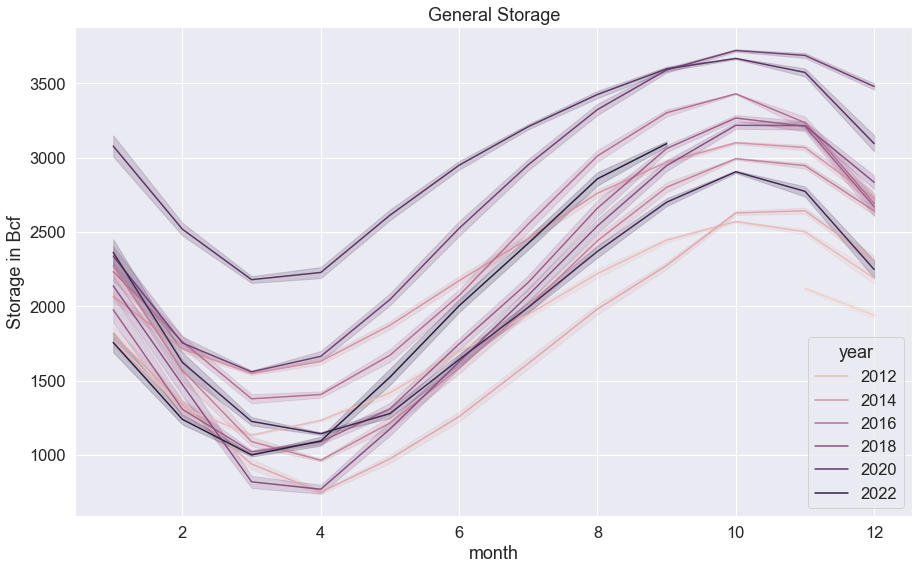

In [94]:
sns.lineplot(x='month', y='Storage in Bcf', hue='year', data=eu_storage).set_title('General Storage')
plt.show()

In [ ]:
eu_storage.drop(['Date',"Open", "High","Low","Vol.","Change %"], axis=1, inplace=True)

In [116]:
# Select Date and storage
df = eu_storage[["Gas Day Start","Storage in Bcf"]] 
# Rename the features: These names are required for the model fitting
df = eu_storage.rename(columns = {"Gas Day Start":"ds","Storage in Bcf":"y"}) 
df.head()


ds  Gas in storage (TWh)  Full (%)  Trend (%)  Injection (GWh/d)  \
0 2022-09-05              914.9142      0.90       0.00            3791.52   
1 2022-09-04              911.4735     81.92       0.41            4740.01   
2 2022-09-03              906.8938     81.51       0.40            4614.09   
3 2022-09-02              902.4630     81.11       0.31            3799.10   
4 2022-09-01              898.9731     80.80       0.34            4381.57   

   Withdrawal (GWh/d)  Working gas volume (TWh)  Injection capacity (GWh/d)  \
0               380.3               101112.0090                    11699.42   
1               189.5                 1112.5986                    11678.27   
2               201.4                 1112.5986                    11678.49   
3               314.7                 1112.5986                    11678.69   
4               584.4                 1112.5986                    11678.64   

   Withdrawal capacity (GWh/d)  year  month            y  Injection in Bcf  \
0                     19886.49  2022      9  3121.816833         12.937203   
1                     19890.61  2022      9  3110.076677         16.173585   
2                     19890.04  2022      9  3094.450092         15.743929   
3                     19889.50  2022      9  3079.331575         12.963067   
4                     19889.66  2022      9  3067.423542         14.950537   

   Withdrawal in Bcf  day  
0           1.297637    0  
1           0.646601    6  
2           0.687205    5  
3           1.073801    4  
4           1.994056    3

In [107]:
train = df[df.ds<'2022-01-01']
test = df[df.ds>='2022-01-01']

In [108]:
m = Prophet(seasonality_mode='additive')
m.fit(df)

11:13:43 - cmdstanpy - INFO - Chain [1] start processing
11:13:45 - cmdstanpy - INFO - Chain [1] done processing


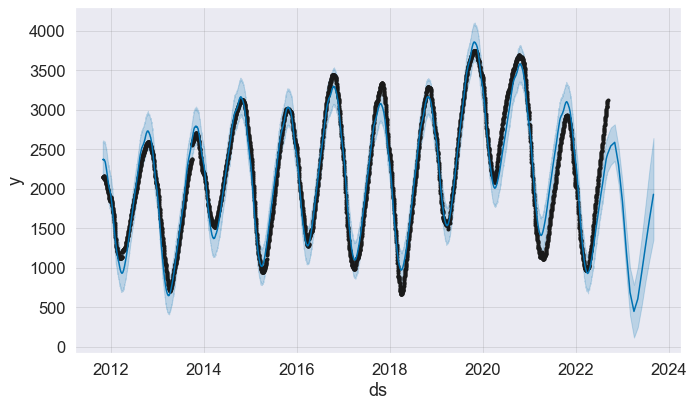

In [119]:
future = m.make_future_dataframe(12, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

In [110]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)
#the model is not perfoming well

In [111]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
4009 2023-08-06  1686.949958  1098.708325  2280.808708
4010 2023-08-13  1772.036836  1170.376782  2382.656311
4011 2023-08-20  1849.786303  1210.486175  2505.051693
4012 2023-08-27  1909.385342  1245.811510  2572.762247
4013 2023-09-03  1947.759496  1248.051804  2651.880235

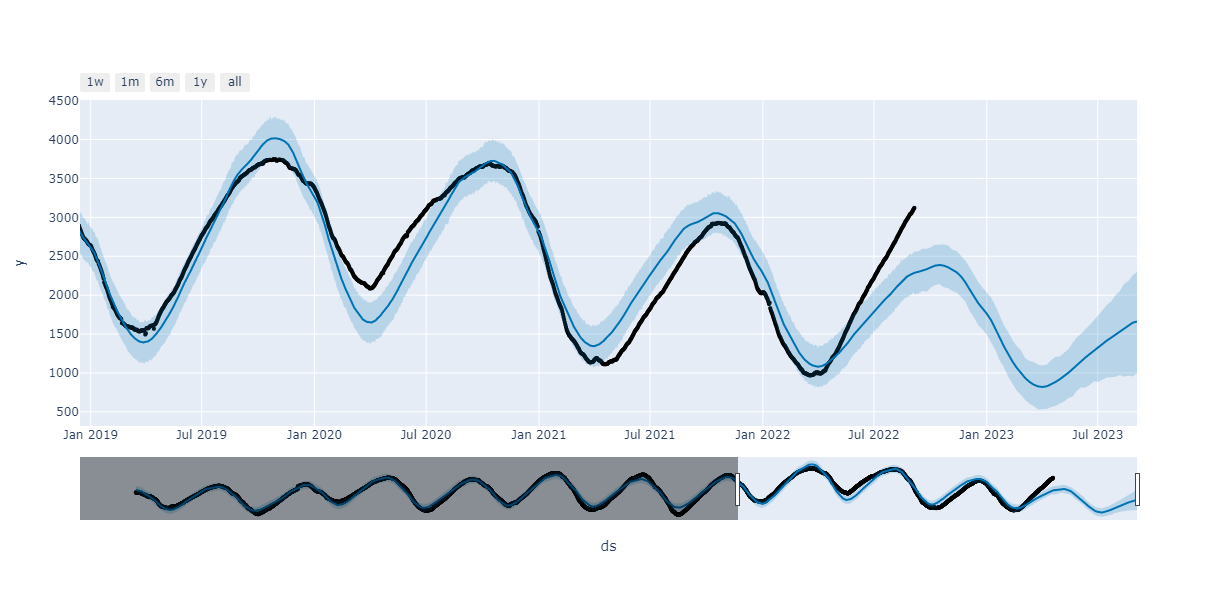

In [104]:
# static plotting
#fig1 = m.plot(forecast)

# interactive plotting
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

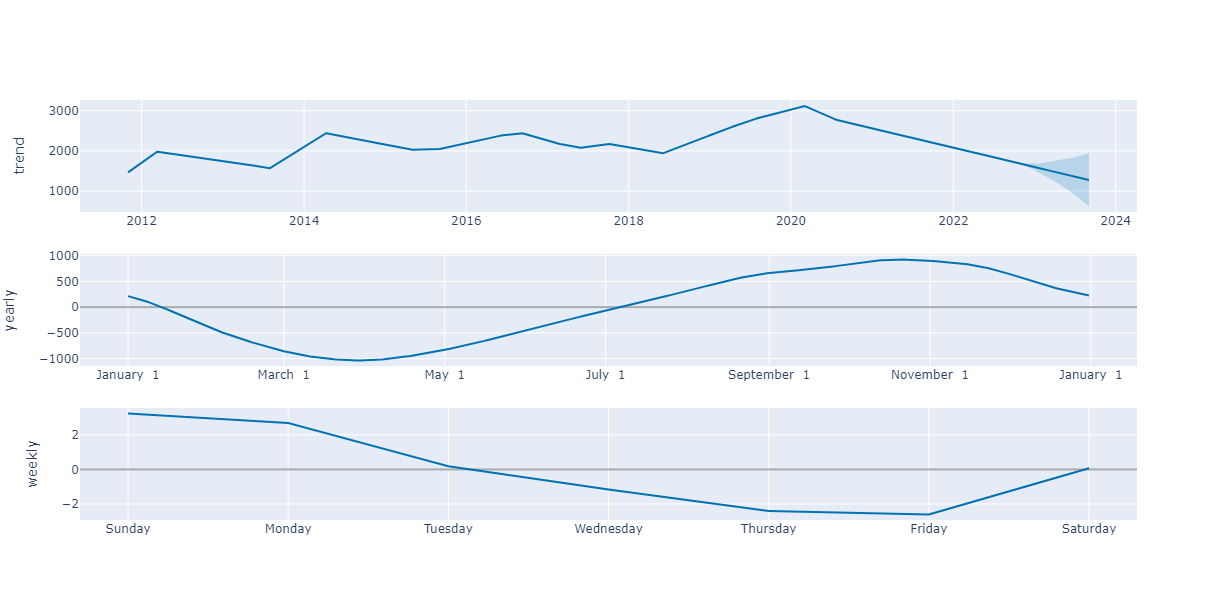

In [112]:
#fig2 = m.plot_components(forecast)

plot_components_plotly(m, forecast)

In [113]:
pred_err = test.merge(forecast[forecast['ds']>='2022-01-01'][['ds','yhat']])
pred_err['pred_error'] = pred_err.y - pred_err.yhat
pred_err

ds  Gas in storage (TWh)  Full (%)  Trend (%)  Injection (GWh/d)  \
0   2022-09-05              914.9142      0.90       0.00            3791.52   
1   2022-09-04              911.4735     81.92       0.41            4740.01   
2   2022-09-03              906.8938     81.51       0.40            4614.09   
3   2022-09-02              902.4630     81.11       0.31            3799.10   
4   2022-09-01              898.9731     80.80       0.34            4381.57   
..         ...                   ...       ...        ...                ...   
243 2022-01-05              588.5382     52.99      -0.39             565.01   
244 2022-01-04              592.7334     53.36      -0.25            1131.49   
245 2022-01-03              595.5332     53.61      -0.15            1572.83   
246 2022-01-02              597.0875     53.76      -0.01            2303.97   
247 2022-01-01              597.1406     53.76       0.18            3913.47   

     Withdrawal (GWh/d)  Working gas volume (TWh)  Injection capacity (GWh/d)  \
0                 380.3               101112.0090                    11699.42   
1                 189.5                 1112.5986                    11678.27   
2                 201.4                 1112.5986                    11678.49   
3                 314.7                 1112.5986                    11678.69   
4                 584.4                 1112.5986                    11678.64   
..                  ...                       ...                         ...   
243              4843.6                 1110.7599                    11263.09   
244              3961.6                 1110.7599                    11262.91   
245              3188.2                 1110.7599                    11263.08   
246              2377.0                 1110.7433                    11263.03   
247              1898.4                 1110.7209                    11263.26   

     Withdrawal capacity (GWh/d)  year  month            y  Injection in Bcf  \
0                       19886.49  2022      9  3121.816833         12.937203   
1                       19890.61  2022      9  3110.076677         16.173585   
2                       19890.04  2022      9  3094.450092         15.743929   
3                       19889.50  2022      9  3079.331575         12.963067   
4                       19889.66  2022      9  3067.423542         14.950537   
..                           ...   ...    ...          ...               ...   
243                     19559.34  2022      1  2008.175695          1.927894   
244                     19559.83  2022      1  2022.490311          3.860804   
245                     19559.39  2022      1  2032.043626          5.366719   
246                     19557.61  2022      1  2037.347117          7.861472   
247                     19556.25  2022      1  2037.528302         13.353314   

     Withdrawal in Bcf  day         yhat  pred_error  
0             1.297637    0  2437.530873  684.285960  
1             0.646601    6  2434.347910  675.728767  
2             0.687205    5  2427.198310  667.251781  
3             1.073801    4  2420.250222  659.081353  
4             1.994056    3  2415.851130  651.572411  
..                 ...  ...          ...         ...  
243          16.527049    2  2234.226312 -226.050617  
244          13.517540    1  2251.475130 -228.984818  
245          10.878590    0  2269.261202 -237.217576  
246           8.110661    6  2284.505524 -247.158407  
247           6.477610    5  2295.497742 -257.969440  

[248 rows x 17 columns]

In [114]:
# MAE: 
mae = np.mean(np.abs(pred_err.pred_error))
print(f'MAE: {round(mae,2)}')
# MAPE
mape = np.mean(np.abs(pred_err.pred_error/pred_err.y))*100
print(f'MAPE: {round(mape,2)}%')

MAE: 296.14
MAPE: 14.96%


In [117]:
# Select Date and storage
df2 = eu_storage[["Gas Day Start","Storage in Bcf"]] 
# Rename the features: These names are required for the model fitting
df2 = eu_storage.rename(columns = {"Gas Day Start":"ds","Withdrawal in Bcf":"y"}) 
df2.head()

ds  Gas in storage (TWh)  Full (%)  Trend (%)  Injection (GWh/d)  \
0 2022-09-05              914.9142      0.90       0.00            3791.52   
1 2022-09-04              911.4735     81.92       0.41            4740.01   
2 2022-09-03              906.8938     81.51       0.40            4614.09   
3 2022-09-02              902.4630     81.11       0.31            3799.10   
4 2022-09-01              898.9731     80.80       0.34            4381.57   

   Withdrawal (GWh/d)  Working gas volume (TWh)  Injection capacity (GWh/d)  \
0               380.3               101112.0090                    11699.42   
1               189.5                 1112.5986                    11678.27   
2               201.4                 1112.5986                    11678.49   
3               314.7                 1112.5986                    11678.69   
4               584.4                 1112.5986                    11678.64   

   Withdrawal capacity (GWh/d)  year  month  Storage in Bcf  Injection in Bcf  \
0                     19886.49  2022      9     3121.816833         12.937203   
1                     19890.61  2022      9     3110.076677         16.173585   
2                     19890.04  2022      9     3094.450092         15.743929   
3                     19889.50  2022      9     3079.331575         12.963067   
4                     19889.66  2022      9     3067.423542         14.950537   

          y  day  
0  1.297637    0  
1  0.646601    6  
2  0.687205    5  
3  1.073801    4  
4  1.994056    3

In [120]:
train2 = df2[df2.ds<'2022-01-01']
test2 = df2[df2.ds>='2022-01-01']

In [121]:
m2 = Prophet(seasonality_mode='additive')
m2.fit(df2)

11:20:46 - cmdstanpy - INFO - Chain [1] start processing
11:20:47 - cmdstanpy - INFO - Chain [1] done processing


In [122]:
future2 = m2.make_future_dataframe(12, freq='M')
forecast2 = m2.predict(future2)
fig2 = m2.plot(forecast2)

In [125]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m2, forecast2)